Titanic_Train

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Fill missing values in 'Age' with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-6-dbfa84f3a22d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-6-dbfa84f3a22d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


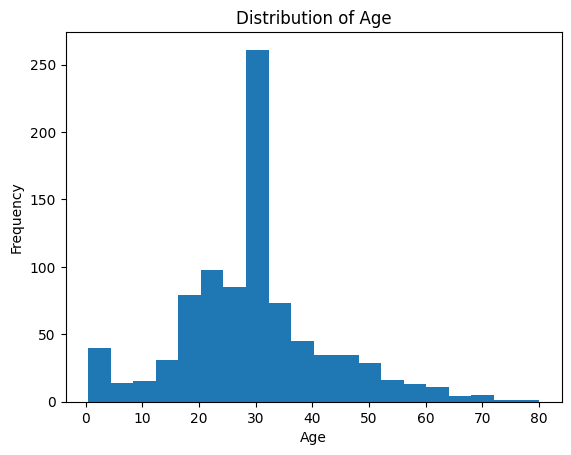

In [8]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

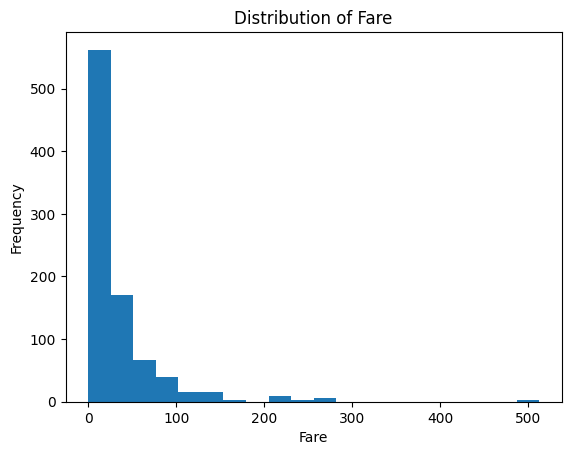

In [9]:
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.show()

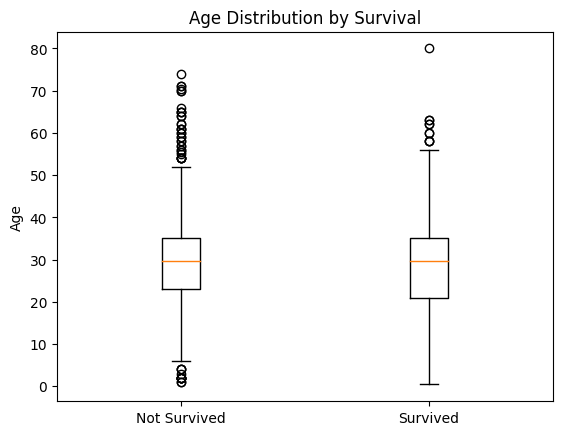

In [10]:
plt.boxplot([df[df['Survived'] == 0]['Age'], df[df['Survived'] == 1]['Age']], labels=['Not Survived', 'Survived'])
plt.ylabel('Age')
plt.title('Age Distribution by Survival')
plt.show()

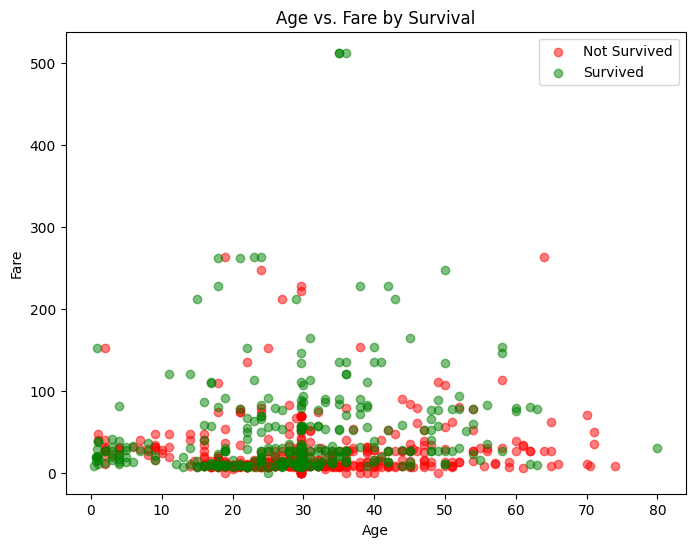

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], color='red', label='Not Survived', alpha=0.5)
plt.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], color='green', label='Survived', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare by Survival')
plt.legend()
plt.show()

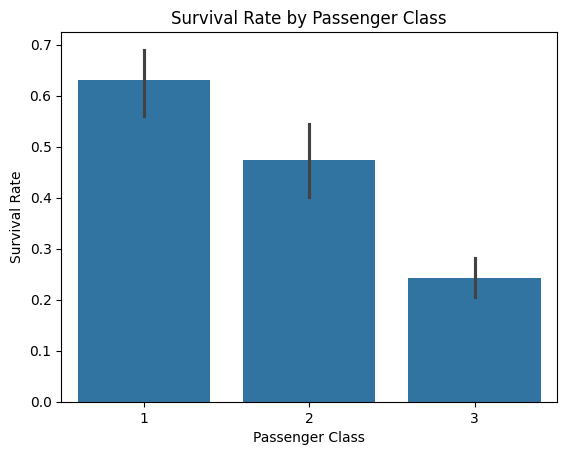

In [13]:
import seaborn as sns  # Import Seaborn for better visualization

# Bar plot for survival rate by 'Pclass' (Passenger Class)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [14]:
# One-hot encode 'Sex', 'Embarked', and 'Cabin'
encoded_df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Cabin'], prefix=['Sex', 'Embarked', 'Cabin'])

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Label encode 'Sex' and 'Embarked'
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'])

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0


In [18]:
from sklearn.preprocessing import StandardScaler

  # Create a StandardScaler object
scaler = StandardScaler()

  # Fit and transform the 'Age' and 'Fare' columns
df[['Age_scaled', 'Fare_scaled']] = scaler.fit_transform(df[['Age', 'Fare']])

In [20]:
from sklearn.preprocessing import MinMaxScaler

  # Create a MinMaxScaler object
scaler = MinMaxScaler()

  # Fit and transform the 'Age' and 'Fare' columns
df[['Age_normalized', 'Fare_normalized']] = scaler.fit_transform(df[['Age', 'Fare']])

In [21]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger themselves

In [22]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [23]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = encoded_df.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = encoded_df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
encoded_df = df.copy()

# List of categorical features to encode
categorical_features = ['Name', 'Ticket', 'Sex', 'Embarked', 'Cabin', 'AgeGroup']
encoded_df = pd.get_dummies(encoded_df, columns=['Sex', 'Embarked', 'Cabin', 'AgeGroup'],
                            prefix=['Sex', 'Embarked', 'Cabin', 'AgeGroup'],
                            drop_first=True)
for feature in ['Name', 'Ticket']:
    le = LabelEncoder()
    encoded_df[feature] = le.fit_transform(encoded_df[feature].astype(str))

# Define your features (X) and target (y)
X = encoded_df.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = encoded_df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
model_lgbm = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred_lgbm = model_lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [33]:
import xgboost as xgb

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set parameters (you can tune these further)
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'eta': 0.05,
    'max_depth': 3,
    'subsample': 0.8
}

# Train the model
model_xgb = xgb.train(params, dtrain, num_boost_round=100)  # Adjust num_boost_round as needed

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(dtest)
y_pred_xgb = (y_pred_xgb > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

In [34]:

import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- LightGBM ---
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters (you can tune these further)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
model_lgbm = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_lgbm = (y_pred_lgbm > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

# --- XGBoost ---
# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set parameters (you can tune these further)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.05,
    'max_depth': 3,
    'subsample': 0.8
}

# Train the model
model_xgb = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(dtest)
y_pred_xgb = (y_pred_xgb > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

# --- Evaluation ---
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

print("LightGBM Model Evaluation:")
evaluate_model(y_test, y_pred_lgbm)

print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, y_pred_xgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [35]:
from sklearn.model_selection import cross_val_score

# LightGBM
cv_scores_lgbm = cross_val_score(lgb.LGBMClassifier(objective='binary', metric='binary_logloss'), X, y, cv=5, scoring='accuracy')
print(f"LightGBM Cross-Validation Accuracy: {cv_scores_lgbm.mean():.4f}")

# XGBoost
cv_scores_xgb = cross_val_score(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'), X, y, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy: {cv_scores_xgb.mean():.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [36]:
from sklearn.model_selection import GridSearchCV

# LightGBM
param_grid_lgbm = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'feature_fraction': [0.8, 0.9, 1.0]
}
grid_search_lgbm = GridSearchCV(lgb.LGBMClassifier(objective='binary', metric='binary_logloss'), param_grid_lgbm, cv=5, scoring='accuracy')
grid_search_lgbm.fit(X, y)
print(f"LightGBM Best Parameters: {grid_search_lgbm.best_params_}")

# XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'eta': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X, y)
print(f"XGBoost Best Parameters: {grid_search_xgb.best_params_}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [66]:
# ... (previous code for training and evaluation) ...

print("LightGBM Model Evaluation:")
evaluate_model(y_test, y_pred_lgbm)

print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, y_pred_xgb)

LightGBM Model Evaluation:
Accuracy: 0.8045
Precision: 0.7826
Recall: 0.7297
F1-Score: 0.7552
AUC: 0.7934

XGBoost Model Evaluation:
Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1-Score: 0.7746
AUC: 0.8097


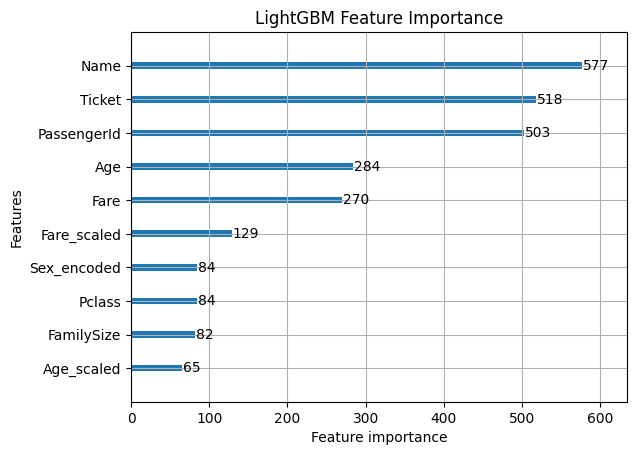

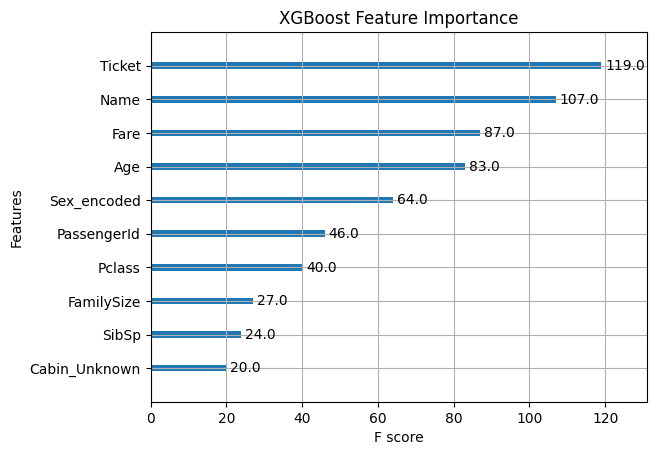

In [37]:
import matplotlib.pyplot as plt

# LightGBM Feature Importance
lgb.plot_importance(model_lgbm, max_num_features=10)
plt.title("LightGBM Feature Importance")
plt.show()

# XGBoost Feature Importance
xgb.plot_importance(model_xgb, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()

Titanic_Test

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv('/content/Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


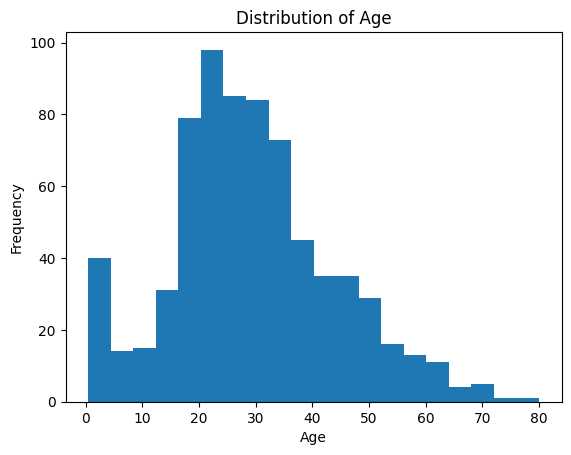

In [43]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

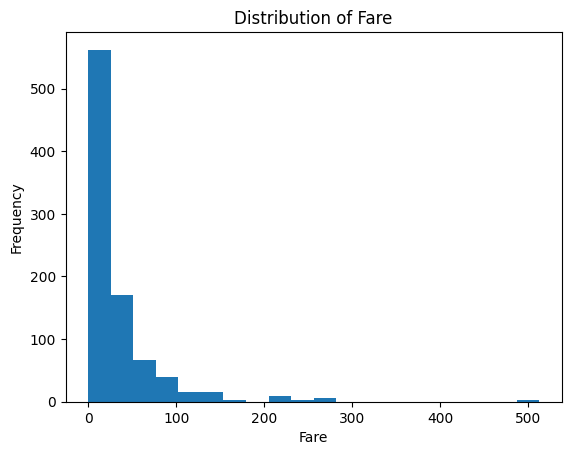

In [44]:
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.show()

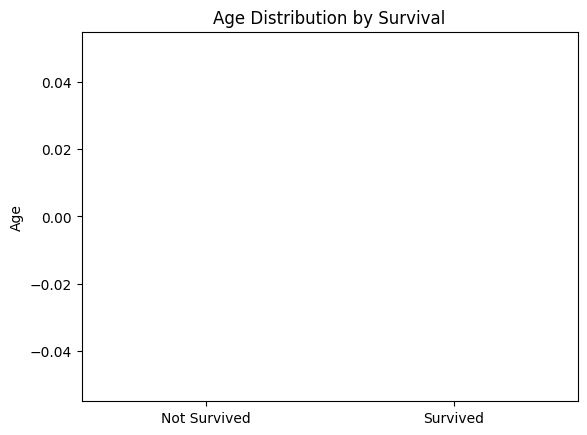

In [45]:
plt.boxplot([df[df['Survived'] == 0]['Age'], df[df['Survived'] == 1]['Age']], labels=['Not Survived', 'Survived'])
plt.ylabel('Age')
plt.title('Age Distribution by Survival')
plt.show()

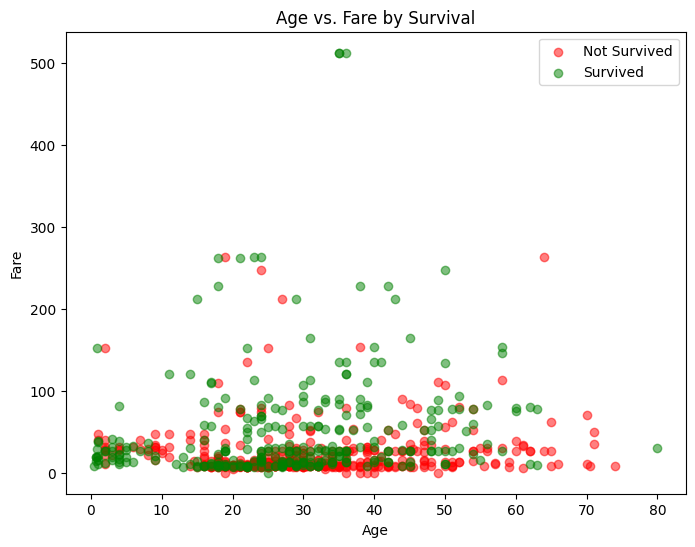

In [46]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'],
            color='red', label='Not Survived', alpha=0.5)
plt.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'],
            color='green', label='Survived', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare by Survival')
plt.legend()
plt.show()

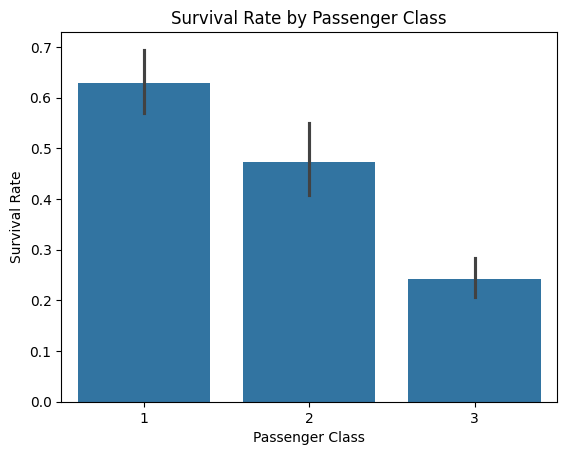

In [47]:
import seaborn as sns

sns.barplot(x='Pclass', y='Survived', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [48]:
# Fill missing values in 'Age' with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-48-dbfa84f3a22d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-48-dbfa84f3a22d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [49]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [50]:
import pandas as pd

encoded_df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Cabin'], prefix=['Sex', 'Embarked', 'Cabin'])

In [51]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Label encode 'Sex' and 'Embarked'
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'])

In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age_scaled', 'Fare_scaled']] = scaler.fit_transform(df[['Age', 'Fare']])

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age_normalized', 'Fare_normalized']] = scaler.fit_transform(df[['Age', 'Fare']])

In [56]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [57]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100],
                           labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [58]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = encoded_df.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = encoded_df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
# Exclude 'Name' and 'Ticket' columns from features
X = encoded_df.drop(['Survived', 'Name', 'Ticket'], axis=1)  # Features
y = encoded_df['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters (you can tune these further)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
model_lgbm = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred_lgbm = model_lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [61]:
import xgboost as xgb

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set parameters (you can tune these further)
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'eta': 0.05,
    'max_depth': 3,
    'subsample': 0.8
}

# Train the model
model_xgb = xgb.train(params, dtrain, num_boost_round=100)  # Adjust num_boost_round as needed

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(dtest)

In [62]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- LightGBM ---
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set parameters (you can tune these further)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
model_lgbm = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_lgbm = (y_pred_lgbm > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

# --- XGBoost ---
# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set parameters (you can tune these further)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.05,
    'max_depth': 3,
    'subsample': 0.8
}

# Train the model
model_xgb = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(dtest)
y_pred_xgb = (y_pred_xgb > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

# --- Evaluation ---
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

print("LightGBM Model Evaluation:")
evaluate_model(y_test, y_pred_lgbm)

print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, y_pred_xgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [63]:
from sklearn.model_selection import cross_val_score

# LightGBM
cv_scores_lgbm = cross_val_score(lgb.LGBMClassifier(objective='binary', metric='binary_logloss'), X, y, cv=5, scoring='accuracy')
print(f"LightGBM Cross-Validation Accuracy: {cv_scores_lgbm.mean():.4f}")

# XGBoost
cv_scores_xgb = cross_val_score(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'), X, y, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy: {cv_scores_xgb.mean():.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [64]:
from sklearn.model_selection import GridSearchCV

# LightGBM
param_grid_lgbm = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'feature_fraction': [0.8, 0.9, 1.0]
}
grid_search_lgbm = GridSearchCV(lgb.LGBMClassifier(objective='binary', metric='binary_logloss'), param_grid_lgbm, cv=5, scoring='accuracy')
grid_search_lgbm.fit(X, y)
print(f"LightGBM Best Parameters: {grid_search_lgbm.best_params_}")

# XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'eta': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X, y)
print(f"XGBoost Best Parameters: {grid_search_xgb.best_params_}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [65]:
print("LightGBM Model Evaluation:")
evaluate_model(y_test, y_pred_lgbm)

print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, y_pred_xgb)

LightGBM Model Evaluation:
Accuracy: 0.8045
Precision: 0.7826
Recall: 0.7297
F1-Score: 0.7552
AUC: 0.7934

XGBoost Model Evaluation:
Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1-Score: 0.7746
AUC: 0.8097


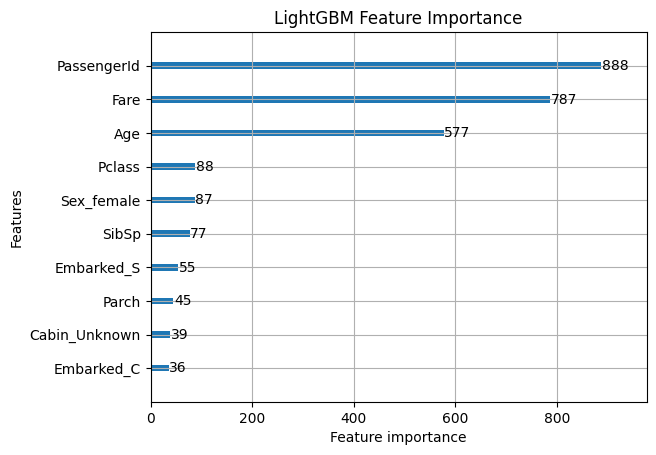

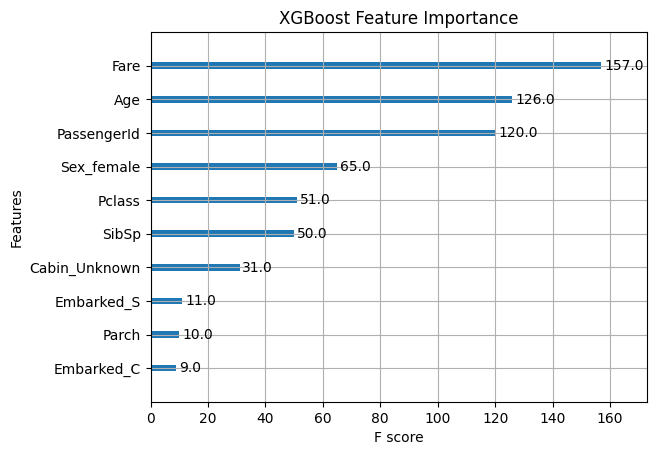

In [67]:
import matplotlib.pyplot as plt

# LightGBM Feature Importance
lgb.plot_importance(model_lgbm, max_num_features=10)
plt.title("LightGBM Feature Importance")
plt.show()

# XGBoost Feature Importance
xgb.plot_importance(model_xgb, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()